# David Brown
# MIS581 Portfolio Project
# Logistic Regression to Predict Ten Year CHD Risk
# 2022-06-30


In [5]:
# Libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
sns.set_style('white')
%matplotlib inline

In [13]:
# Read in framingham.csv dataset
url = "https://raw.githubusercontent.com/DavidBrownRRT/MIS581/main/framingham.csv?token=GHSAT0AAAAAABWUW3QCLQHC2BHTADQNTYQWYWRRR4A"


In [14]:
df = pd.read_csv(url)  #Original
dfI = df # For imputation of missing values
# First 5 rows
dfI.head()

HTTPError: ignored

# Data Cleaning

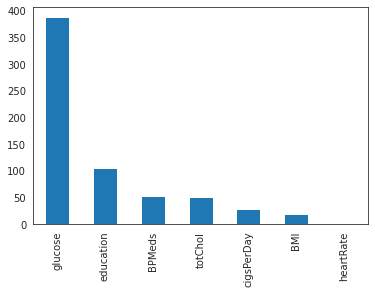

In [ ]:
#Visualize Null Values
(df.isna()
 .sum()
 .sort_values(ascending=False)
 .where(lambda x: x>0)
 .dropna()
 .plot(kind='bar')
)
plt.show()

In [4]:
# Null value assessment table
dfI.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Impute missing data
# Impute data for missing values. Using mode for categorical data
# and median for continuous variables
dfI['education'] = dfI['education'].fillna(dfI['education'].mode()[0])
dfI['cigsPerDay'] = round(dfI['cigsPerDay'].fillna(dfI['cigsPerDay'].median())) # Dist negatively skewed
dfI['BPMeds'] = dfI['BPMeds'].fillna(dfI['BPMeds'].mode()[0])
dfI['totChol'] = dfI['totChol'].fillna(dfI['totChol'].median()) #  Dist negatively skewed
dfI['BMI'] = dfI['BMI'].fillna(dfI['BMI'].median()) # High positive outliers
dfI['heartRate'] = dfI['heartRate'].fillna(dfI['heartRate'].mean()) # Normal distribution
dfI['glucose'] = dfI['glucose'].fillna(dfI['glucose'].median()) 
# Null value assessment
dfI.isnull().sum() #Confirm no missing values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Subset Data by Variable Type

In [ ]:
cat = dfI[["male", "education", "currentSmoker","BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]]
cont = dfI[["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "age"]]

# Descriptive Statistics

In [ ]:
dfI.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
education,4238.0,1.954696,1.018510,1.00,1.00,2.0,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
cigsPerDay,4238.0,8.941482,11.902399,0.00,0.00,0.0,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.0000,1.0
totChol,4238.0,236.689476,44.327427,107.00,206.00,234.0,262.0000,696.0


In [ ]:
# Continuous Variables
cont.describe().T

,count,mean,std,min,25%,50%,75%,max
cigsPerDay,4238.0,8.941482,11.902399,0.00,0.00,0.0,20.0000,70.0
totChol,4238.0,236.689476,44.327427,107.00,206.00,234.0,262.0000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.0000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.8750,142.5
BMI,4238.0,25.800205,4.071041,15.54,23.08,25.4,28.0375,56.8
heartRate,4238.0,75.878924,12.025177,44.00,68.00,75.0,83.0000,143.0
glucose,4238.0,81.603587,22.865246,40.00,72.00,78.0,85.0000,394.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0


# Correlation Analysis of Variables


In [ ]:
# Correlation of all categorical variables with TenYearCHD
cat.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
prevalentHyp       0.177603
diabetes           0.097317
male               0.088428
BPMeds             0.086417
prevalentStroke    0.061810
currentSmoker      0.019456
education         -0.052812
Name: TenYearCHD, dtype: float64

In [ ]:
# Correlation of all continous variables with TenYearCVD
contplusten = dfI[["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "age","TenYearCHD"]]
contplusten.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD    1.000000
age           0.225256
sysBP         0.216429
diaBP         0.145299
glucose       0.121277
totChol       0.081566
BMI           0.074217
cigsPerDay    0.058859
heartRate     0.022898
Name: TenYearCHD, dtype: float64

In [ ]:
# Education vs Smoking Crosstabulation for Counts
cat1 = dfI['education'] 
cat2 = dfI['currentSmoker']
ct = pd.crosstab(cat1,cat2,margins=True)
ct.columns = ['NonSmoker','Smoker','RowTotals']
ct.index = ['HS','College','BS','Grad','ColumnTotals']
observed = ct.iloc[0:4,0:2]
ct

,NonSmoker,Smoker,RowTotals
HS,971,854,1825
College,574,679,1253
BS,366,321,687
Grad,233,240,473
ColumnTotals,2144,2094,4238


In [ ]:
# Chi square critical value 
crit = scipy.stats.chi2.ppf(q=0.95,df=3)
print('Critical Value for p = 0.05 and df = 3: ',crit)
# 18.76 > 7.81 and p < 0.05, thus, reject the null

Critical Value for p = 0.05 and df = 3:  7.814727903251179


In [ ]:
# Chi Square Test of Independence results P-value < 0.05 and critical value > 7.81 = Reject Null
chi_ed_smk = scipy.stats.chi2_contingency(observed=observed)
print(chi_ed_smk)
print('Critical value > 7.81 and P-value < 0.05 = Reject Null')

(18.763607803459568, 0.00030595695448474945, 3, array([[923.26569136, 901.73430864],
       [633.89145824, 619.10854176],
       [347.55261916, 339.44738084],
       [239.29023124, 233.70976876]]))
Critical value > 7.81 and P-value < 0.05 = Reject Null


In [ ]:
# Education vs Diabetes Crosstabulation for Counts
cat2 = dfI['diabetes']
ct1 = pd.crosstab(cat1,cat2,margins=True)
ct1.columns = ['NoDiabetes','Diabetes','RowTotals']
ct1.index = ['HS','College','BS','Grad','ColumnTotals']
observed1 = ct1.iloc[0:4,0:2]
ct1

,NoDiabetes,Diabetes,RowTotals
HS,1762,63,1825
College,1230,23,1253
BS,673,14,687
Grad,464,9,473
ColumnTotals,4129,109,4238


In [ ]:
# Chi Square Test of Independence results 
# P-value < 0.05 and critical value > 7.81 = Reject Null
chi_ed_dm = scipy.stats.chi2_contingency(observed=observed1)
print(chi_ed_dm)
print('Critical value > 7.81 and P-value < 0.05 = Reject Null')

(9.980055820837169, 0.018736431290408313, 3, array([[1778.06158565,   46.93841435],
       [1220.7732421 ,   32.2267579 ],
       [ 669.33058046,   17.66941954],
       [ 460.83459179,   12.16540821]]))
Critical value > 7.81 and P-value < 0.05 = Reject Null


# One-Way ANOVA

In [ ]:
# Education vs BMI One-Way Analysis of Variance
from scipy.stats.stats import F_onewayResult
from scipy.stats import f_oneway
oa_result = f_oneway(dfI.BMI, dfI.education)
print('One-Way ANOVA = ', oa_result, '**Reject Null of P < 0.05')


One-Way ANOVA =  F_onewayResult(statistic=136834.81803592702, pvalue=0.0) **Reject Null of P < 0.05


# Data Visualization - Exploratory Analysis

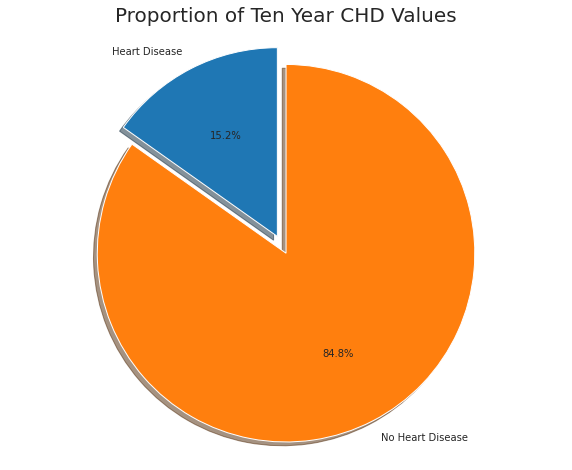

In [ ]:
labels = 'Heart Disease', 'No Heart Disease'
sizes = [dfI.TenYearCHD[dfI["TenYearCHD"]==1].count(), dfI.TenYearCHD[dfI["TenYearCHD"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Ten Year CHD Values", size = 20)
plt.show()

Text(0.5, 1.0, 'Heart Disease by Male')

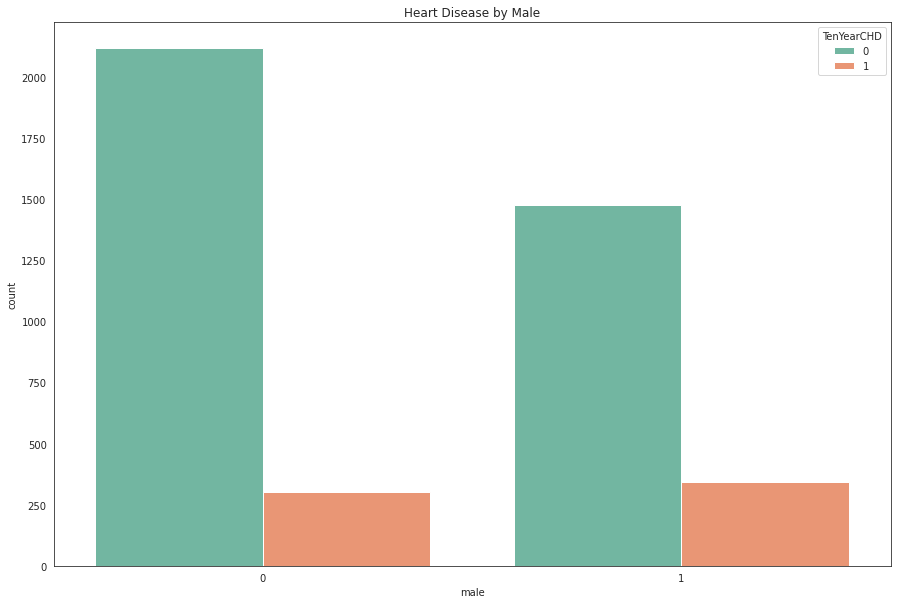

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="male",hue="TenYearCHD", data=dfI, palette="Set2")
plt.title("Heart Disease by Male")

Text(0.5, 1.0, 'Heart Disease by Systolic Blood Pressure ')

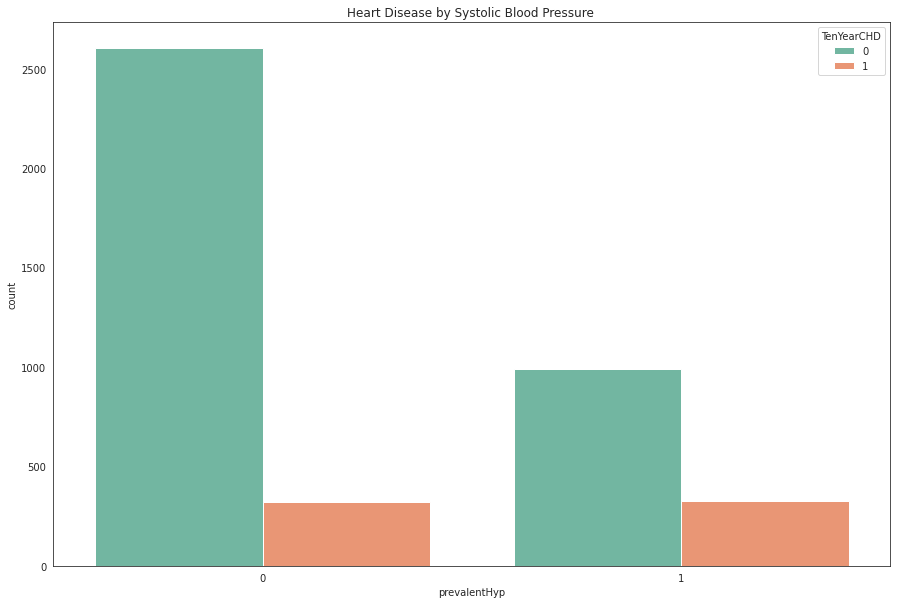

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=dfI,palette="Set2")
plt.title("Heart Disease by Systolic Blood Pressure ")

Text(0.5, 1.0, 'Ten Year CHD by Education ')

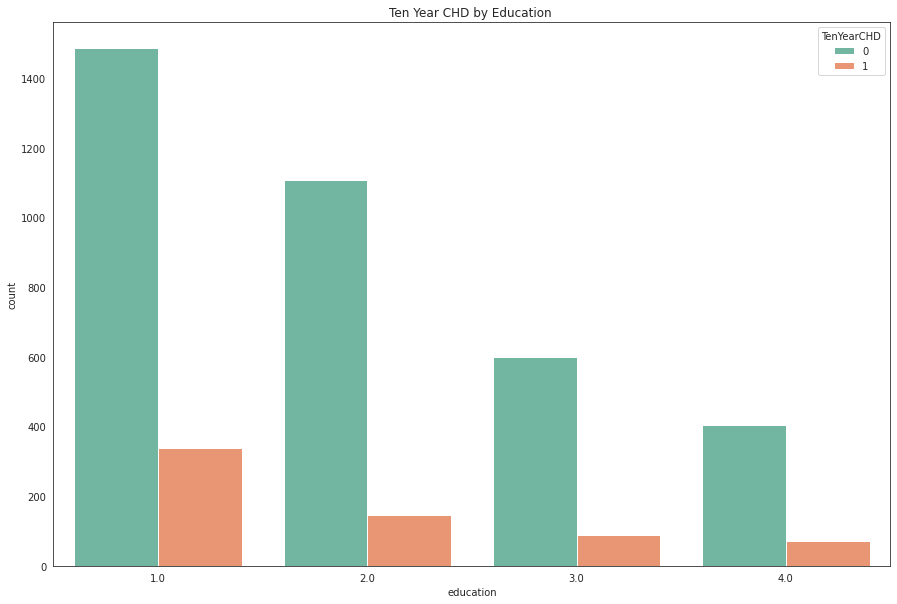

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="education", hue="TenYearCHD", data=dfI,palette="Set2")
plt.title("Ten Year CHD by Education ")

Text(0.5, 1.0, 'Ten Year CHD by Education ')

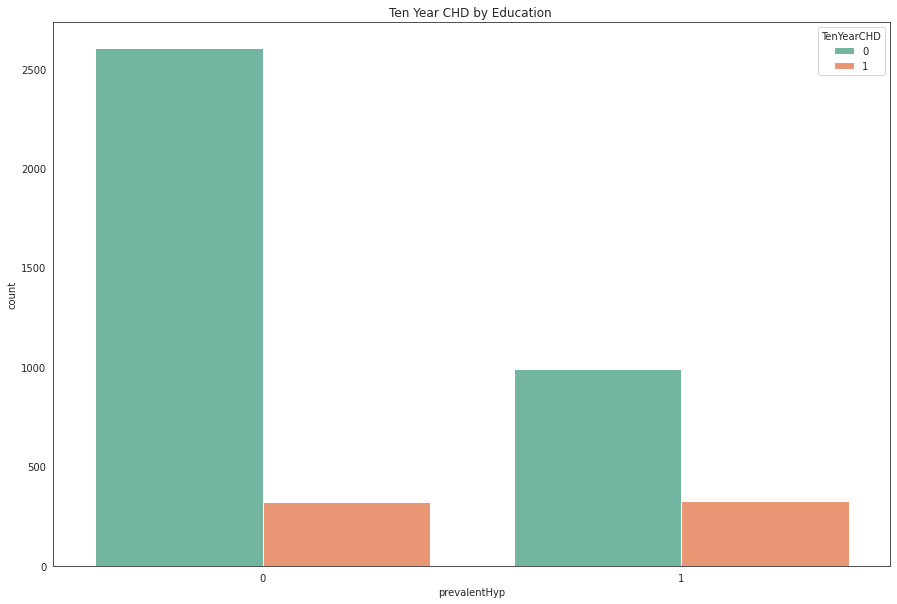

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=dfI,palette="Set2")
plt.title("Ten Year CHD by Education ")

Text(0.5, 1.0, 'Ten Year CHD by Gender ')

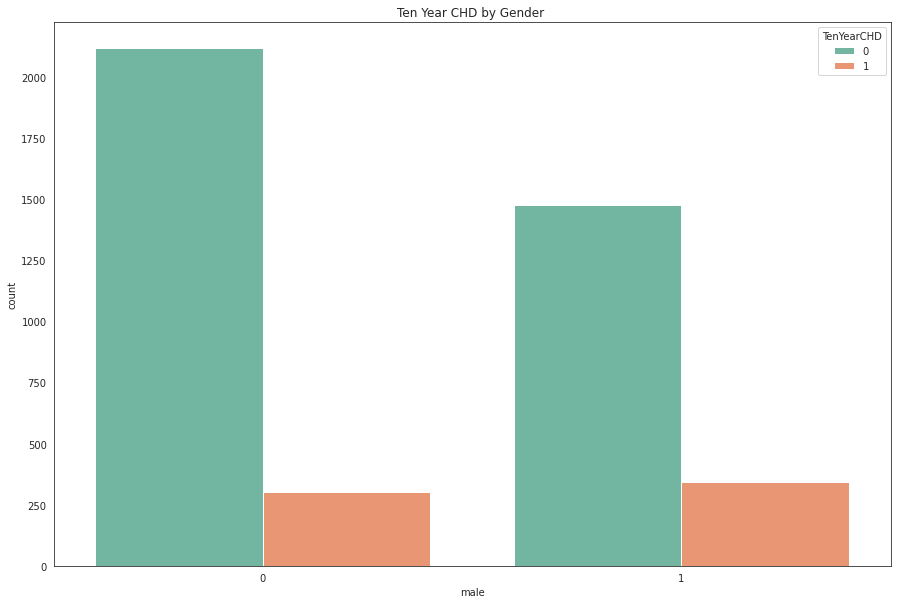

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="male", hue="TenYearCHD", data=dfI,palette="Set2")
plt.title("Ten Year CHD by Gender ")

In [ ]:
import plotly.graph_objects as go
labels = dfI['male'].unique()
values = dfI['male'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="<b>Gender</b>")
fig.show()

# **LOGISTIC REGRESSION**

# Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfI[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]]= ss.fit_transform(df[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]])
dfI.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,4.0,0,-0.751322,0.0,0,0,0,-0.940600,-1.195907,-1.082625,0.287379,0.342744,-0.201359,0
1,0,-0.418257,2.0,0,-0.751322,0.0,0,0,0,0.300313,-0.515187,-0.158988,0.719752,1.590275,-0.245099,0
2,1,-0.184916,1.0,1,0.929210,0.0,0,0,0,0.187503,-0.220209,-0.242955,-0.113057,-0.073099,-0.507537,0


# Data Partitioning

In [ ]:
X = dfI.drop("TenYearCHD",axis=1)
y = dfI["TenYearCHD"]
print(X.columns)
print(y)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 15)
(848, 15)
(3390,)
(848,)


# Supervised Training of Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[ 0.4239869   0.57387679  0.03907334 -0.0399474   0.28891091  0.24144129
   0.76191997  0.19595146  0.01433754  0.03857695  0.30847802  0.02008899
  -0.01925855 -0.06542558  0.18782535]]
[-2.27702639]


In [ ]:
#Model Prediction
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[718   6]
 [115   9]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

0.8573113207547169


In [ ]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(dfI, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [ ]:
valid_col = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
target_col = 'TenYearCHD'

In [ ]:
model.fit(train_df[valid_col], train_df[target_col])

LogisticRegression(solver='liblinear')

In [ ]:
model.coef_.tolist()

[[0.3656910353301382,
  0.5113947389347042,
  0.006818285551706747,
  -0.1555909216079359,
  0.3538630801797799,
  0.6016006933555422,
  0.7940552896070204,
  0.15816099432986097,
  0.28503188553785,
  0.09075706529305082,
  0.32838936198033875,
  0.004427660647586862,
  -0.025155229153575657,
  -0.03949100527056743,
  0.17847530857527846]]

In [ ]:
print(model.intercept_)

[-2.10286206]


# Model Evaluation

In [ ]:
X_train = train_df[valid_col]
X_val = val_df[valid_col]
X_test = test_df[valid_col]
train_preds = model.predict(X_train)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_df[target_col]

1489    0
1368    0
2761    0
741     0
2418    0
       ..
1962    0
2643    0
2689    0
212     0
3369    1
Name: TenYearCHD, Length: 2542, dtype: int64

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.92237155, 0.07762845],
       [0.83469318, 0.16530682],
       [0.96191199, 0.03808801],
       ...,
       [0.95370136, 0.04629864],
       [0.5718086 , 0.4281914 ],
       [0.50580751, 0.49419249]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_df[target_col], train_preds)

0.8571990558615263

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(12, 10))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds
  

Accuracy: 85.72%


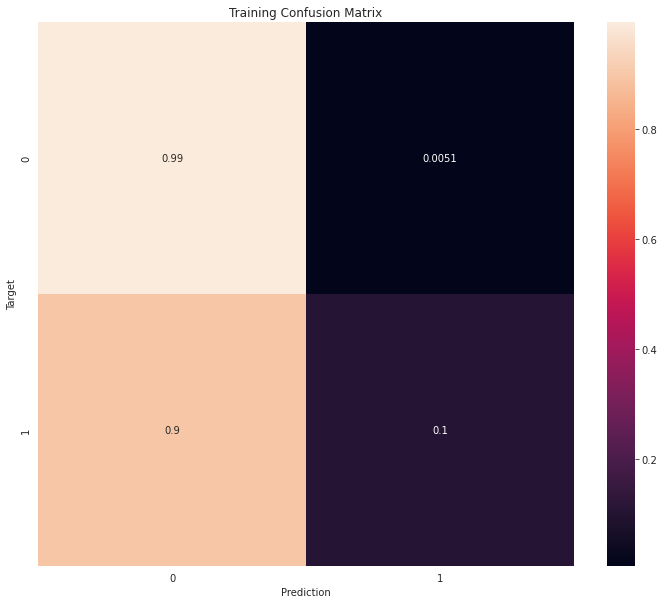

In [ ]:
predict_and_plot(X_train, train_df[target_col], 'Training');

Accuracy: 84.55%


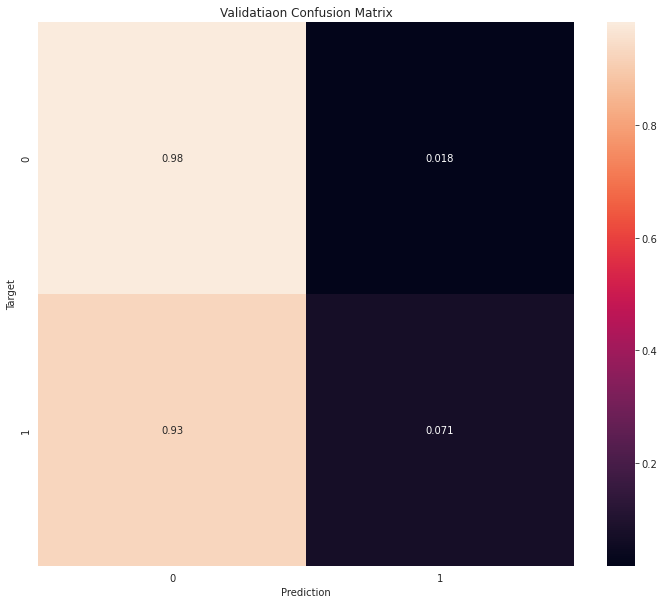

In [ ]:
predict_and_plot(X_val, val_df[target_col], 'Validatiaon');

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

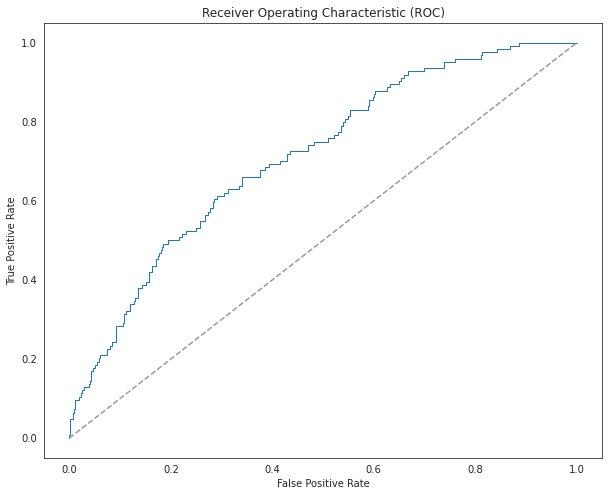

In [ ]:
# ROC Curve Asessment
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
plt.figure(figsize=(10,8))
probas_ = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

In [ ]:
logreg = model
logreg.fit(train_df[valid_col], train_df[target_col])
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
prevalentStroke,0.794055
BPMeds,0.601601
age,0.511395
male,0.365691
cigsPerDay,0.353863
sysBP,0.328389
diabetes,0.285032
glucose,0.178475
prevalentHyp,0.158161
totChol,0.090757


In [ ]:
logreg = model
logreg.fit(X_test, y_test)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
male,0.768012
diabetes,0.531553
prevalentStroke,0.507280
age,0.346794
sysBP,0.328221
prevalentHyp,0.256113
totChol,0.251417
heartRate,0.168479
currentSmoker,0.149790
BMI,0.136042


In [ ]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
male,2.155477
diabetes,1.701572
prevalentStroke,1.660767
age,1.414526
sysBP,1.388495
prevalentHyp,1.291898
totChol,1.285846
heartRate,1.183503
currentSmoker,1.161591
BMI,1.145730
